In [104]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
# Memuat dataset
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

# Menampilkan Beberapa Informasi Dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [106]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])

print(data.head())

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0  
{'F': 0, 'M': 1}


In [107]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])

print(data.head())

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1              1        140          289          0     Normal   
1   49    0              2        160          180          0     Normal   
2   37    1              1        130          283          0         ST   
3   48    0              0        138          214          0     Normal   
4   54    1              2        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0  
{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}


In [108]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])

print(data.head())
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0  
{'LVH': 0, 'Normal': 1, 'ST': 2}


In [109]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])

print(data.head())

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172               0      0.0       Up             0  
1    156               0      1.0     Flat             1  
2     98               0      0.0       Up             0  
3    108               1      1.5     Flat             1  
4    122               0      0.0       Up             0  
{'N': 0, 'Y': 1}


In [110]:
# Inisialisasi encoder
label_encoder = LabelEncoder()

data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

print(data.head())

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  
{'Down': 0, 'Flat': 1, 'Up': 2}


In [111]:
# Informasi awal dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB
None


In [112]:
# Cek Missing Values
data_jantung= data
missing_values = data_jantung.isnull().sum()
missing_percentage = (missing_values / data_jantung.shape[0]) * 100

# Menampilkan jumlah dan persentase missing values untuk setiap fitur
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values per Fitur:")
print(missing_info)

Missing Values per Fitur:
                Missing Values  Percentage
Age                          0         0.0
Sex                          0         0.0
ChestPainType                0         0.0
RestingBP                    0         0.0
Cholesterol                  0         0.0
FastingBS                    0         0.0
RestingECG                   0         0.0
MaxHR                        0         0.0
ExerciseAngina               0         0.0
Oldpeak                      0         0.0
ST_Slope                     0         0.0
HeartDisease                 0         0.0


In [113]:
#cek duplikat
cek_duplikat = data_jantung.duplicated().sum()
print('Duplikat : ', cek_duplikat)

Duplikat :  0


In [114]:
# Fungsi untuk menghapus outliers menggunakan IQR
def remove_outliers(df, features):
    df_jantung = df.copy()
    for feature in features:
        # Pastikan kolomnya bertipe numerik
        if df_jantung[feature].dtype in ['int64', 'float64']:
            Q1 = df_jantung[feature].quantile(0.25)
            Q3 = df_jantung[feature].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_jantung = df_jantung[(df_jantung[feature] >= lower_bound) & (df_jantung[feature] <= upper_bound)]

    return df_jantung

# Mendefinisikan fitur numerik
numerical_features = ['Age','RestingECG', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex', 'HeartDisease', 'ST_Slope', 'ExerciseAngina', 'ChestPainType']
data_jantung_no_outliers = remove_outliers(data_jantung, numerical_features)

# Menampilkan data setelah outliers dihapus
print("Jumlah Data Sebelum Penghapusan Outliers:", data_jantung.shape[0])
print("Jumlah Data Setelah Penghapusan Outliers:", data_jantung_no_outliers.shape[0])


Jumlah Data Sebelum Penghapusan Outliers: 918
Jumlah Data Setelah Penghapusan Outliers: 375


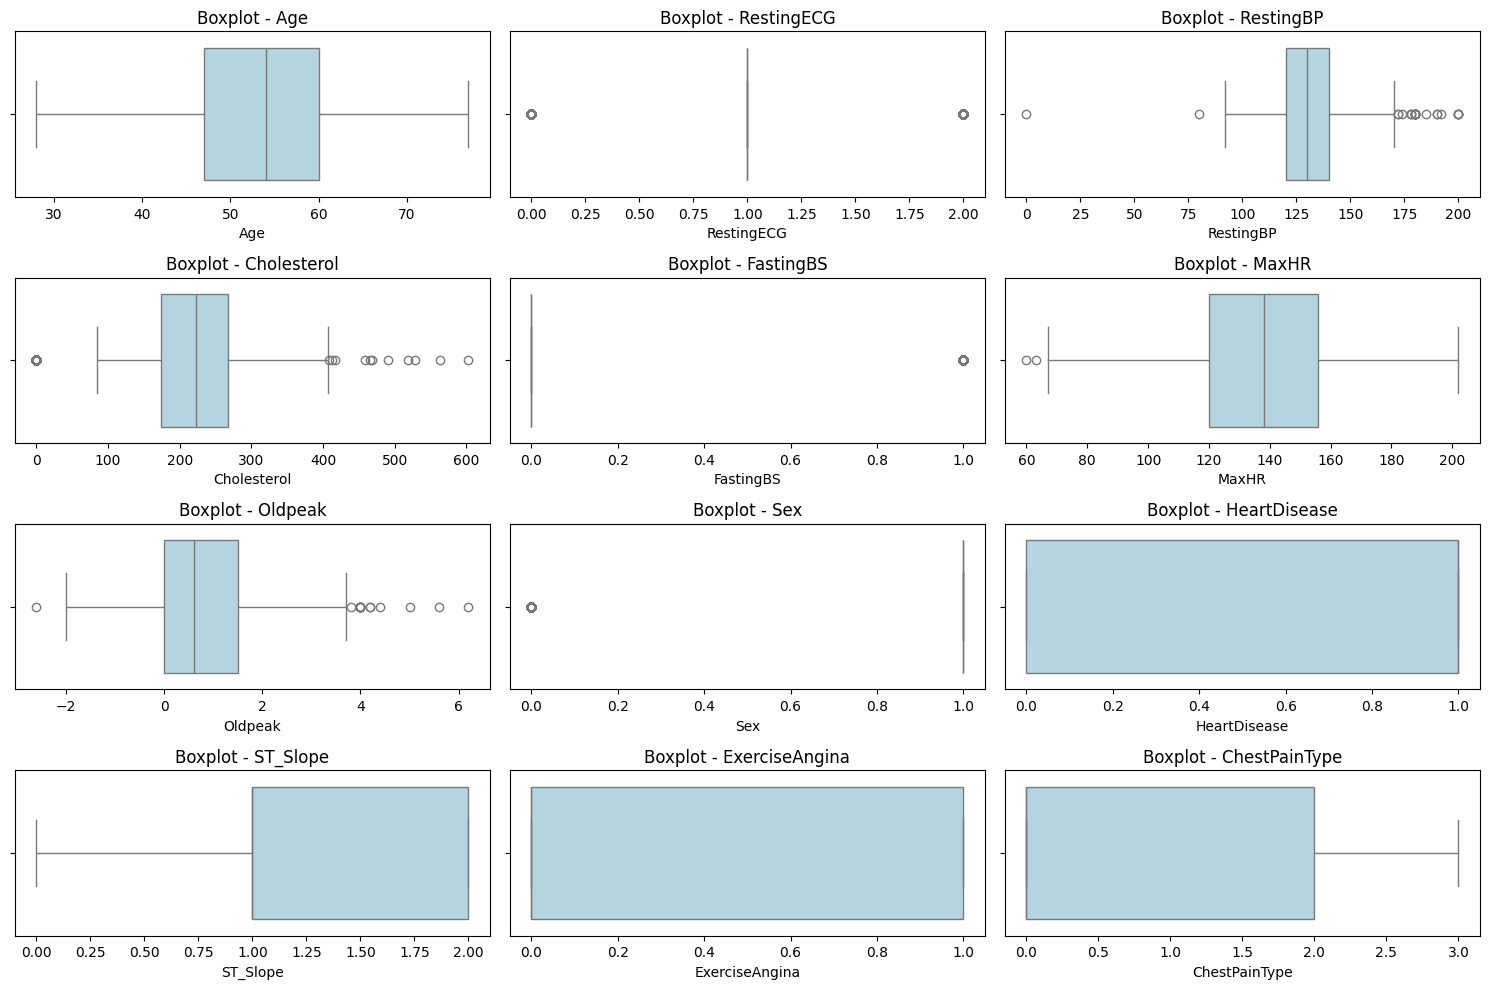

In [115]:
# Visualisasi Outliers dengan boxplot untuk fitur numerik
plt.figure(figsize=(15, 10))
num_rows = 4
num_cols = 3

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)  # Updated layout
    sns.boxplot(x=data_jantung[feature], color='lightblue')
    plt.title(f'Boxplot - {feature}')

plt.tight_layout()
plt.show()

<ipython-input-116-c08613627510>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data_jantung, palette='viridis')


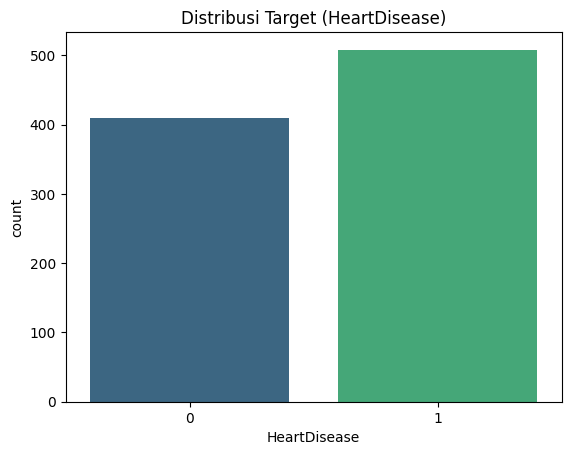

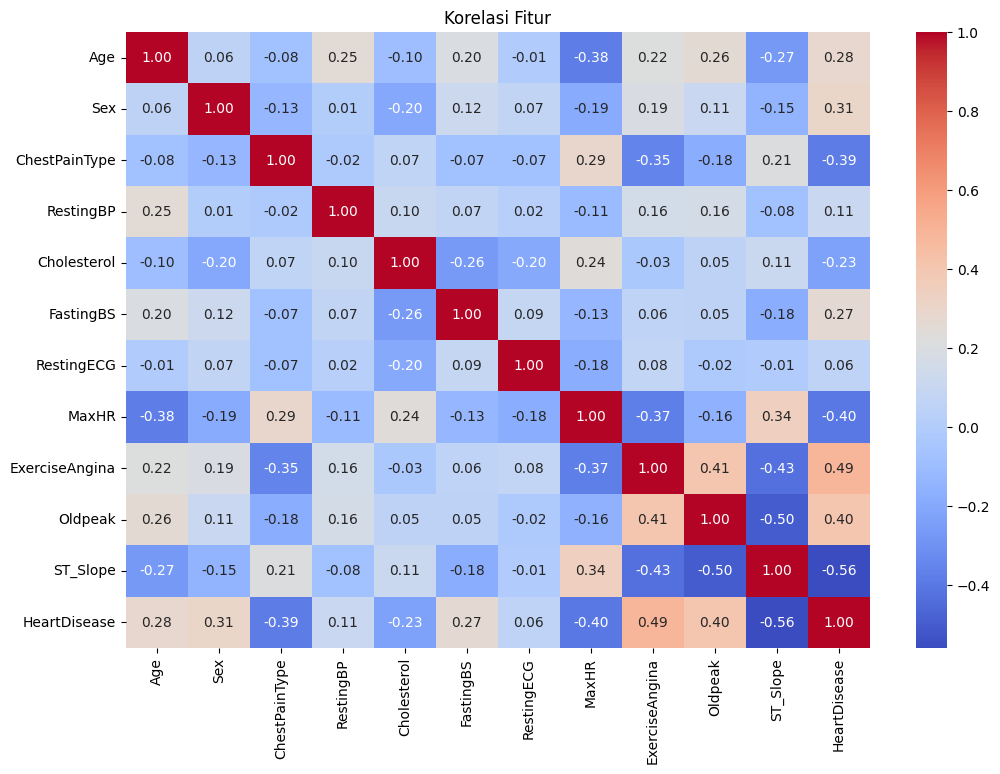

In [116]:
# Visualisasi distribusi target
sns.countplot(x='HeartDisease', data=data_jantung, palette='viridis')
plt.title('Distribusi Target (HeartDisease)')
plt.show()

numerical_data = data_jantung.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [117]:
X = data_jantung_no_outliers.drop(columns=['HeartDisease'])
y = data_jantung_no_outliers['HeartDisease']

categorical_features = ['Age','RestingECG', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex', 'ST_Slope', 'ExerciseAngina', 'ChestPainType']

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Informasi data latih dan uji
print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

Jumlah Data Latih: 300
Jumlah Data Uji: 75



Random Forest - Akurasi: 0.8933333333333333
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.82      0.93      0.87        29

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75



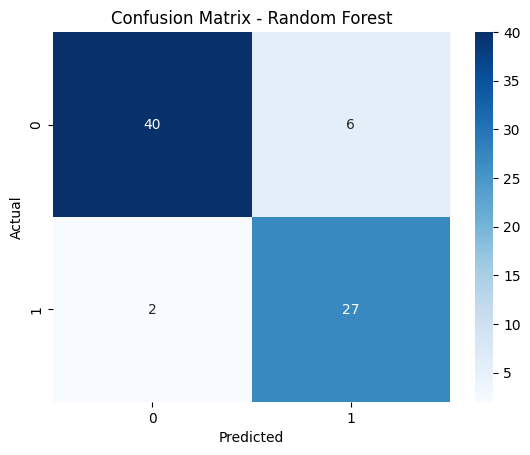

In [122]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest - Akurasi:", rf_accuracy)
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM - Akurasi: 0.8133333333333334
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        46
           1       0.73      0.83      0.77        29

    accuracy                           0.81        75
   macro avg       0.80      0.82      0.81        75
weighted avg       0.82      0.81      0.82        75



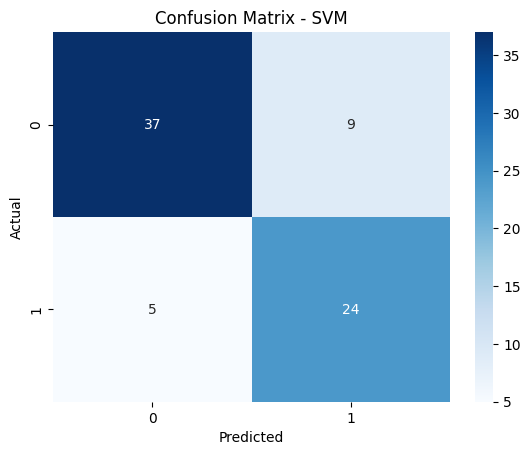

In [123]:
# Membuat model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluasi SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSVM - Akurasi:", svm_accuracy)
print("SVM - Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-121-0d8e945a3c79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='muted')


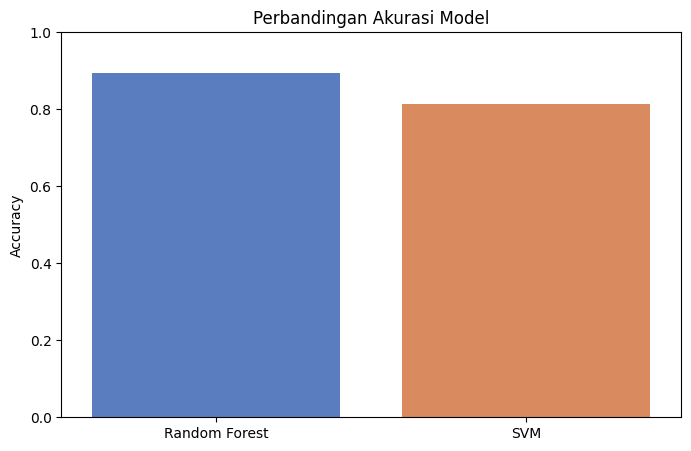

In [121]:
# Perbandingan Akurasi
models = ['Random Forest', 'SVM']
accuracies = [rf_accuracy, svm_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='muted')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
